# <b>Convex Hull in OpenCV</b>

## Making the necessary imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Function to enlarge and show colour images

In [2]:
def show_col_img(img):
    fig = plt.figure(figsize=(9,7.5))
    sub = fig.add_subplot(111)
    sub.imshow(img)

## Function to enlarge and show grayscale images

In [3]:
def show_gray_img(img):
    fig = plt.figure(figsize=(9,7.5))
    sub = fig.add_subplot(111)
    sub.imshow(img, cmap='gray')

## Reading the input image

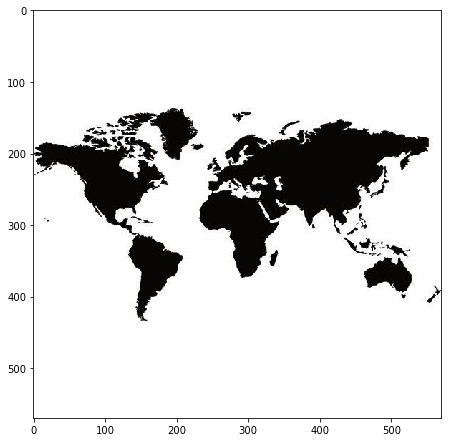

In [4]:
img = cv2.imread("img3.jpg")
show_col_img(img)

In [5]:
img.shape

(570, 570, 3)

## Making Image grayscale

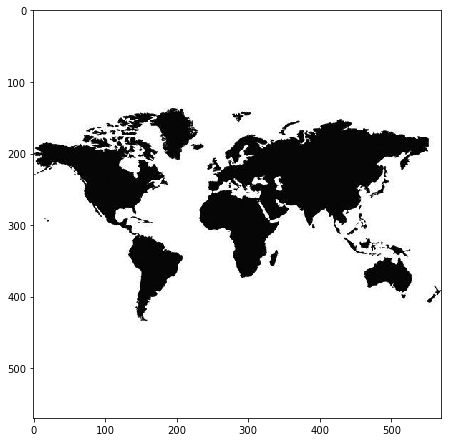

In [6]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_gray_img(gray_img)

In [7]:
gray_img.shape

(570, 570)

## Blurring the image

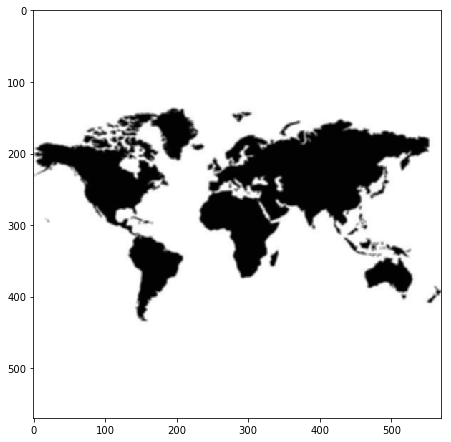

In [8]:
gray_blur = cv2.blur(gray_img, (4, 4))
show_gray_img(gray_blur)

## Applying binray thresholding to the image

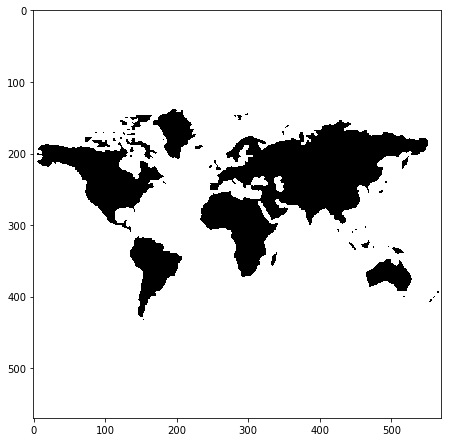

In [9]:
ret, thresh = cv2.threshold(gray_blur, 50, 255, cv2.THRESH_BINARY)
show_gray_img(thresh)

## Finding the contours in the image

In [10]:
img2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## Finding the convex hull for each contour

In [11]:
hulls = []

for i in range(len(contours)):
    hulls.append(cv2.convexHull(contours[i], False))

## Drawing the contours and the convex hulls
### The contours are shown in yellow and the convex hull in blue

In [12]:
final = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

for i in range(len(contours)):
    color_contours = (255, 255, 0) # green - color for contours
    color = (0, 255, 255) # blue - color for convex hull

    cv2.drawContours(final, contours, i, color_contours, 2, 8, hierarchy)

    cv2.drawContours(final, hulls, i, color, 2, 8)

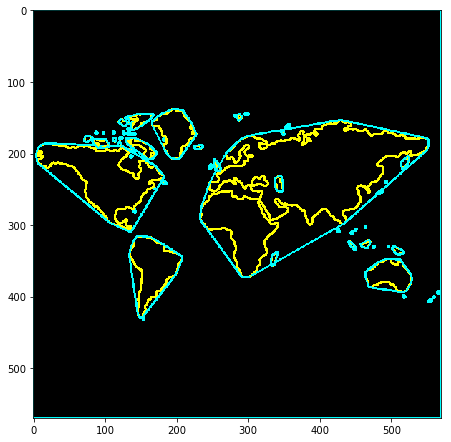

In [13]:
show_col_img(final)